# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

Metal device set to: Apple M1 Pro


2023-03-05 15:30:21.494875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-05 15:30:21.495007: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Compute CMB cl's

## standard "class" computation

Here this calls only original CLASS routines. 

In [2]:
%%time 
M = Class()
M.set(cosmo_params)
M.set({
'output':'tCl,lCl,pCl',
'lensing':'yes',
'l_max_scalars' : 4500
})
M.compute()

CPU times: user 7.6 s, sys: 195 ms, total: 7.79 s
Wall time: 1.54 s


In [3]:
lensed_cls = M.lensed_cl()
l = lensed_cls['ell']
cl_tt = lensed_cls['tt']
cl_ee = lensed_cls['ee']
cl_te = lensed_cls['te']
cl_pp = lensed_cls['pp']

## class_szfast computation

Here we bypass the perturbation module of CLASS to obtain the prediction from high-accuracy COSMOPOWER emulators.

In [4]:
%%time 
M = Class()
M.set(cosmo_params)
M.set({
'output':'tCl,lCl,pCl',
'lensing':'yes',
'l_max_scalars' : 4500
})
M.compute_class_szfast()

CPU times: user 353 ms, sys: 196 ms, total: 548 ms
Wall time: 343 ms


In [5]:
lensed_cls = M.lensed_cl()
l_fast = lensed_cls['ell']
cl_tt_fast = lensed_cls['tt']
cl_ee_fast = lensed_cls['ee']
cl_te_fast = lensed_cls['te']
cl_pp_fast = lensed_cls['pp']

# Plot

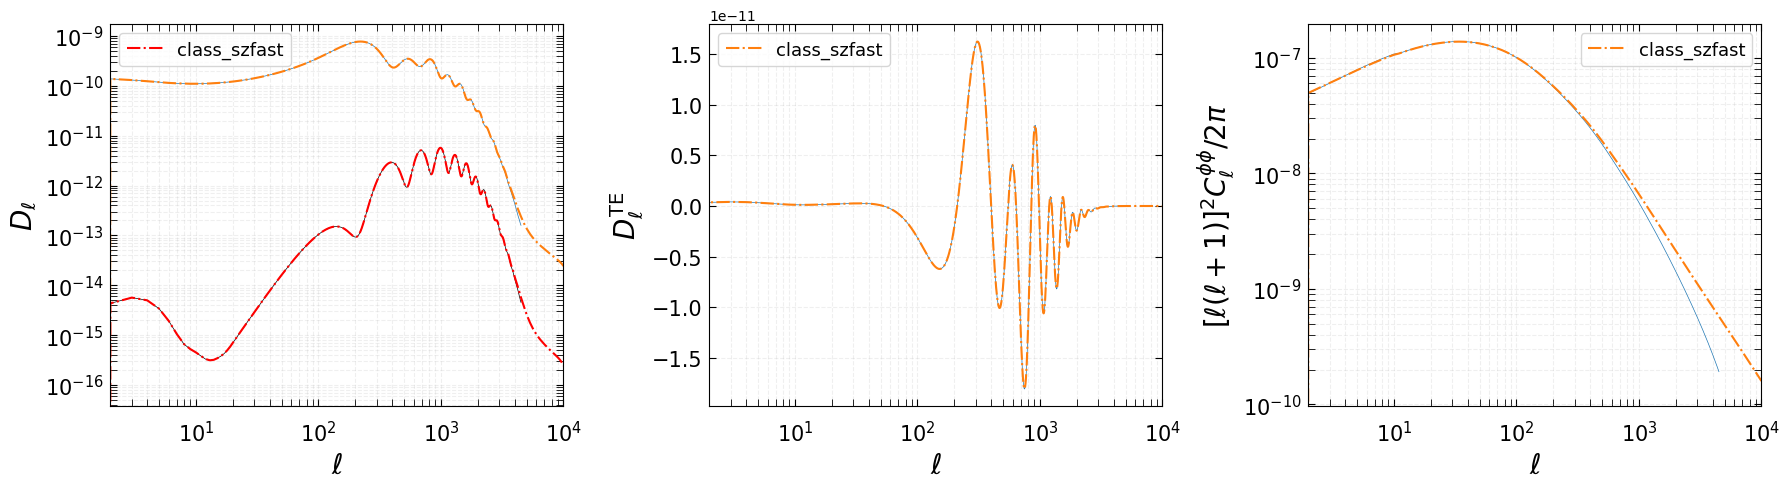

In [8]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l,l_to_dl(l)*cl_tt,lw=0.5)
ax.plot(l_fast,l_to_dl(l_fast)*cl_tt_fast,ls='-.')


ax.plot(l,l_to_dl(l)*cl_ee,lw=0.5,c='k')
ax.plot(l_fast,l_to_dl(l_fast)*cl_ee_fast,ls='-.',c='red',label='class_szfast')



ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l,l_to_dl(l)*cl_te,lw=0.5)
ax.plot(l_fast,l_to_dl(l_fast)*cl_te_fast,ls='-.',label='class_szfast')


ax.set_ylabel(r"$D_\ell^\mathrm{TE}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')

ax.plot(l,l_to_dl(l)*cl_pp*(l*(l+1.)),lw=0.5)
ax.plot(l_fast,l_to_dl(l_fast)*cl_pp_fast*(l_fast*(l_fast+1.)),ls='-.',label='class_szfast')

ax.set_ylabel(r"$[\ell(\ell+1)]^2 C_\ell^{\phi\phi}/2\pi$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)
fig.tight_layout()
plt.savefig('figures/cmb_cls.pdf')